In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import log_loss, accuracy_score
from tqdm import tqdm

# 2. Fonctions

In [74]:
def initialisation(n0, n1, n2):
    # layer 1 params
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    
    # Layer 2 params
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return params

In [56]:
def forward_propagation(X, params):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1': A1,
        'A2': A2
    }
    
    return activations

In [ ]:
def back_propagation(X, y, activations, params):
    
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = params['W2']
    
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    # Keepdims pour permettre de conserver un tableau db2 a deux dim
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    return gradients

In [ ]:
def update(gradients, params, learning_rate):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return params

In [81]:
def predict(X, params):
    activations = forward_propagation(X, params)
    A2 = activations['A2']
    return A2 >= 0.5

In [127]:
def neural_network(X_train, y_train, n1, learning_rate=0.1, n_iter=1000):
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    params = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    
    # Gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, params)
        gradient = back_propagation(X_train, y_train, activations, params)
        params = update(gradient, params, learning_rate)
        
        if i % 10 == 0:
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, params)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
    
    # Plotting the loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train acc")
    plt.legend()
    plt.show()
    
    # Plotting the decision boundary
    x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
    y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, params)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='summer')
    plt.scatter(X[0, :], X[1, :], c=y, cmap='summer', edgecolors='k')
    plt.title("Frontière de décision")
    plt.show()
    
    return params

Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


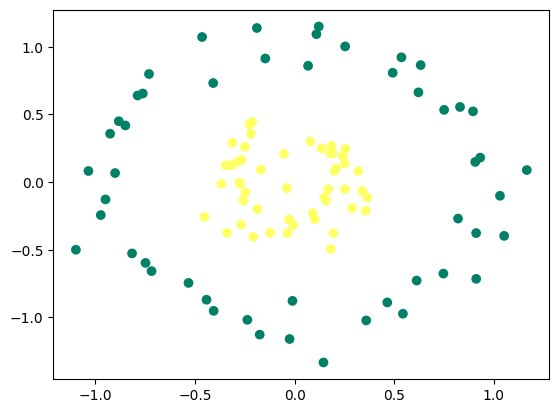

In [123]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\dariu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\dariu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\dariu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\dariu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\dariu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to 

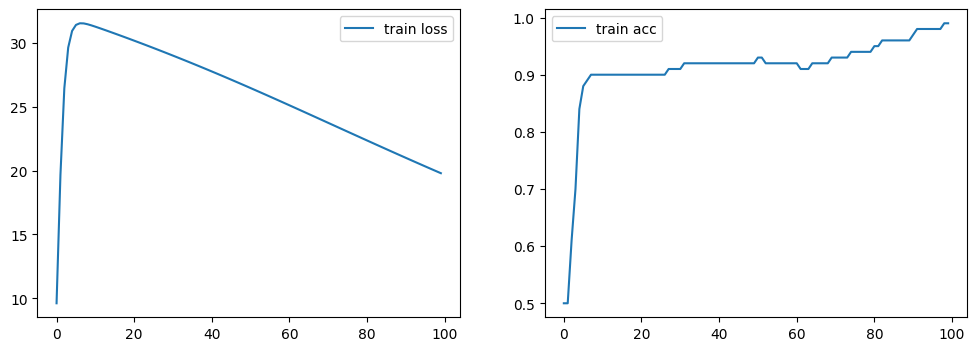

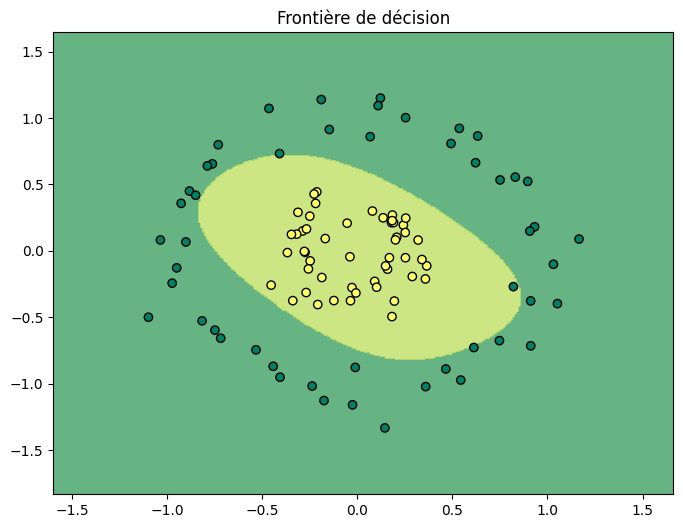

{'W1': array([[ 3.78844908,  0.90956454],
        [ 1.64707464,  3.58750422],
        [ 1.89594751, -0.97338501],
        [ 1.56447598, -0.39982952],
        [-0.07747944,  0.19784266],
        [-0.2676611 ,  2.72276635],
        [ 0.64034658,  0.08794559],
        [ 0.40303842,  0.31836651]]),
 'b1': array([[ 1.97248308],
        [-1.9838802 ],
        [-0.29051511],
        [-0.97157845],
        [-2.6767718 ],
        [ 1.45320513],
        [ 0.86949095],
        [-0.77254665]]),
 'W2': array([[ 3.25622244, -3.75252054, -0.76145828, -1.25420951,  1.43758161,
          2.05630694, -0.56366326, -0.11785268]]),
 'b2': array([[-2.03652836]])}

In [131]:
neural_network(X, y, n1=8)